In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [221]:
df=pd.read_csv('./summeranalytics2020/train.csv')

In [222]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [223]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1628.0,814.500000,470.107435,1.0,407.75,814.5,1221.25,1628.0
Age,1628.0,35.645577,9.481794,18.0,29.00,34.0,42.00,60.0
Attrition,1628.0,0.482187,0.499836,0.0,0.00,0.0,1.00,1.0
DistanceFromHome,1628.0,9.735258,8.306546,1.0,2.00,8.0,15.00,29.0
Education,1628.0,2.884521,1.020470,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1628.0,1000.985872,585.417694,1.0,509.25,977.0,1494.00,2068.0
EnvironmentSatisfaction,1628.0,2.646192,1.125283,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1628.0,2.650491,0.736330,1.0,2.00,3.0,3.00,4.0
JobSatisfaction,1628.0,2.639435,1.096272,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1628.0,5785.524570,4339.293147,1009.0,2625.00,4304.0,7124.25,19999.0


In [224]:
df.shape

(1628, 29)

In [225]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [226]:
df.isna().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [227]:
df.isnull().values.any()

False

In [228]:
df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

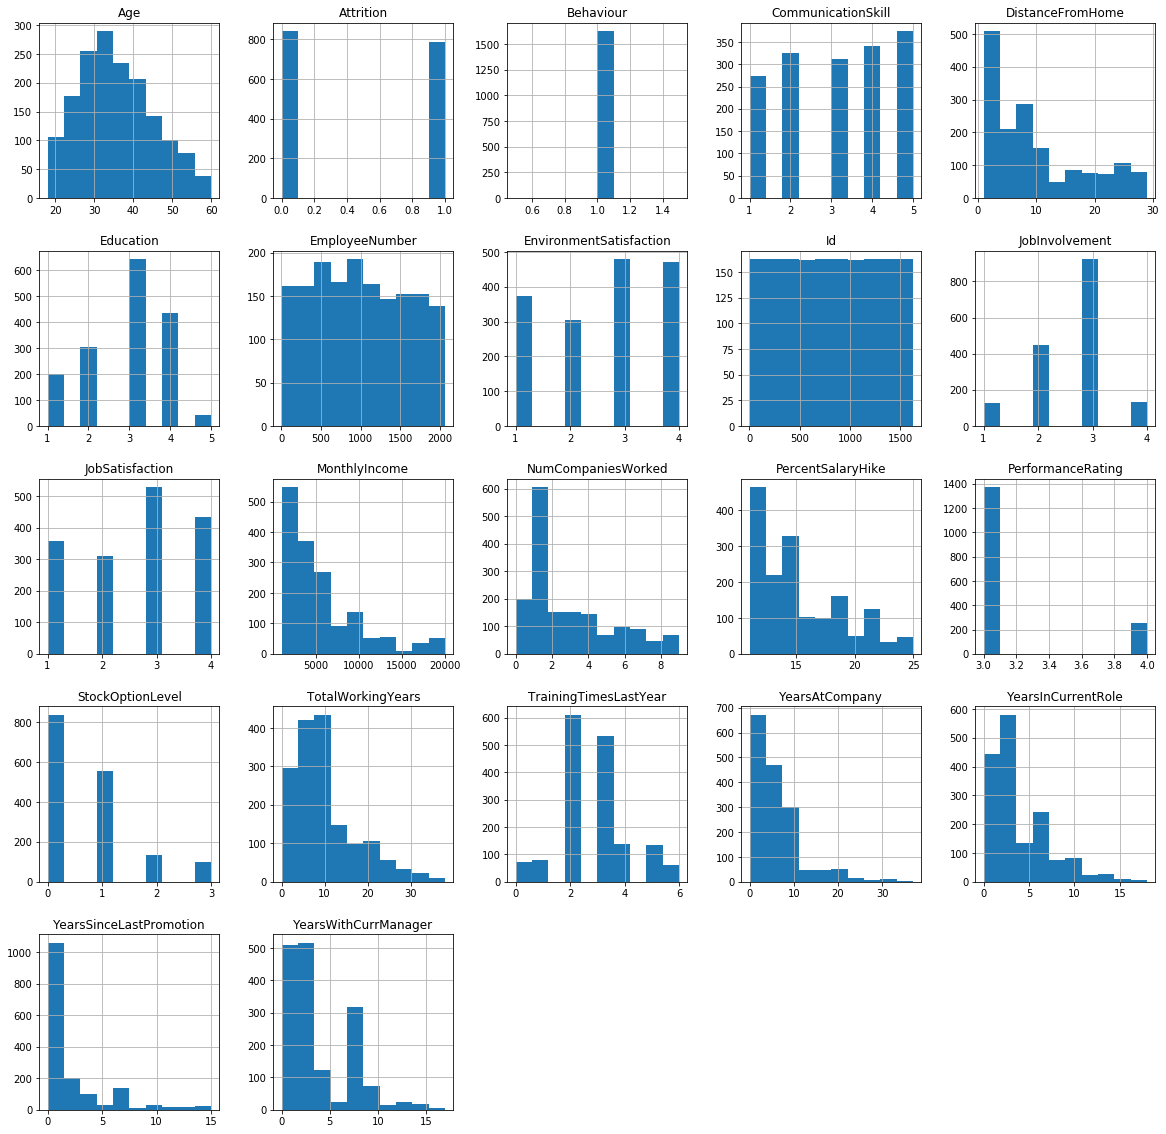

In [230]:
df.hist(figsize=(20,20))
plt.show()

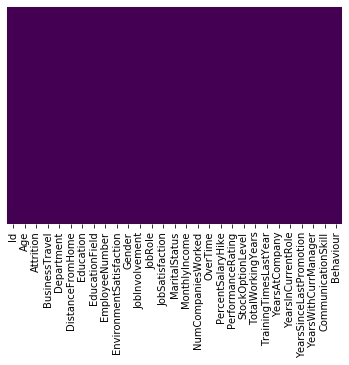

In [231]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [232]:
df.drop(['Id'],axis=1,inplace=True)

In [233]:
print(df.shape)

(1628, 28)


In [234]:
X_train=df.drop(['Attrition'],axis=1)
y_train=df['Attrition']

In [235]:
df_test=pd.read_csv("./summeranalytics2020/test.csv")
df_test.drop(['Id'],axis=1,inplace=True)

In [236]:
df_test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,...,4,1,5,3,5,2,0,4,5,1
1,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,...,4,2,13,4,7,7,5,7,3,1
2,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,...,3,2,13,2,7,7,6,7,4,1
3,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,...,3,1,8,4,4,3,0,2,5,1
4,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,...,3,0,9,5,9,7,0,8,2,1


In [237]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [238]:
df.shape

(1628, 28)

In [239]:
df_test.shape

(470, 27)

In [240]:
X_train.head(10)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,...,3,0,12,2,11,7,6,7,4,1
1,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,...,3,2,7,2,3,2,1,1,2,1
2,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,...,3,0,12,3,9,7,7,3,5,1
3,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,...,3,0,18,2,7,7,1,7,4,1
4,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,...,3,1,10,2,10,7,7,8,1,1
5,31,Travel_Rarely,Sales,7,4,Life Sciences,941,2,Male,2,...,3,0,13,2,7,7,5,2,2,1
6,32,Travel_Rarely,Research & Development,1,3,Life Sciences,331,4,Male,2,...,3,0,4,2,3,2,1,2,1,1
7,33,Travel_Rarely,Research & Development,4,4,Medical,1502,1,Female,2,...,3,0,8,5,5,4,0,2,5,1
8,35,Travel_Frequently,Sales,11,2,Marketing,1137,4,Male,3,...,3,1,5,3,5,2,0,2,4,1
9,21,Travel_Rarely,Sales,7,1,Marketing,1780,2,Male,3,...,3,0,1,3,1,0,1,0,5,1


In [241]:
final_df=pd.concat([df,df_test],axis=0)

In [242]:
final_df.shape

(2098, 28)

In [243]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0.0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0.0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1.0,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0.0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0.0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [244]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2098 non-null   int64  
 1   Attrition                1628 non-null   float64
 2   BusinessTravel           2098 non-null   object 
 3   Department               2098 non-null   object 
 4   DistanceFromHome         2098 non-null   int64  
 5   Education                2098 non-null   int64  
 6   EducationField           2098 non-null   object 
 7   EmployeeNumber           2098 non-null   int64  
 8   EnvironmentSatisfaction  2098 non-null   int64  
 9   Gender                   2098 non-null   object 
 10  JobInvolvement           2098 non-null   int64  
 11  JobRole                  2098 non-null   object 
 12  JobSatisfaction          2098 non-null   int64  
 13  MaritalStatus            2098 non-null   object 
 14  MonthlyIncome            

In [245]:
final_df.isnull().sum()

Age                          0
Attrition                  470
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
CommunicationSkill           0
Behaviour                    0
dtype: int64

In [246]:
columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']


In [247]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [248]:
final_df['Attrition']

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
465    NaN
466    NaN
467    NaN
468    NaN
469    NaN
Name: Attrition, Length: 2098, dtype: float64

In [249]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0.0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0.0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1.0,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0.0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0.0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [250]:
final_df=category_onehot_multcols(columns)


BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [251]:
final_df.dtypes


Age                          int64
Attrition                  float64
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobSatisfaction              int64
MonthlyIncome                int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
CommunicationSkill           int64
Behaviour                    int64
Travel_Frequently            uint8
Travel_Rarely                uint8
Research & Development       uint8
Sales                        uint8
Life Sciences                uint8
Marketing                    uint8
Medical                      uint8
Other               

In [252]:
final_df.shape

(2098, 42)

In [253]:
final_df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,30,0.0,2,3,571,3,3,4,2564,0,...,1,0,0,0,0,0,0,0,1,0
1,36,0.0,12,4,1614,3,3,3,4663,9,...,0,0,1,0,0,0,0,1,0,1
2,55,1.0,2,1,842,3,3,4,5160,4,...,0,0,0,0,0,1,0,0,1,0
3,39,0.0,24,1,2014,1,3,4,4108,7,...,0,0,0,0,1,0,0,0,1,0
4,37,0.0,3,3,689,3,3,3,9434,1,...,0,0,1,0,0,0,0,1,0,0


In [254]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [255]:
final_df.shape

(2098, 42)

In [256]:
final_df

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,30,0.0,2,3,571,3,3,4,2564,0,...,1,0,0,0,0,0,0,0,1,0
1,36,0.0,12,4,1614,3,3,3,4663,9,...,0,0,1,0,0,0,0,1,0,1
2,55,1.0,2,1,842,3,3,4,5160,4,...,0,0,0,0,0,1,0,0,1,0
3,39,0.0,24,1,2014,1,3,4,4108,7,...,0,0,0,0,1,0,0,0,1,0
4,37,0.0,3,3,689,3,3,3,9434,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,4,1692,4,3,2,1393,1,...,1,0,0,0,0,0,0,0,1,0
466,18,NaN,3,2,1624,2,3,4,1569,1,...,0,0,0,0,0,0,1,0,1,1
467,24,NaN,23,3,639,2,4,4,2725,1,...,0,0,0,0,1,0,0,1,0,1
468,31,NaN,23,3,367,2,2,4,5582,0,...,0,0,0,0,0,0,0,1,0,0


In [257]:
df_Train=final_df.iloc[:1628,:]
df_Test=final_df.iloc[1628:,:]

In [258]:
df_Train.shape

(1628, 42)

In [259]:
df_Test.shape

(470, 42)

In [260]:
df_Test.drop(['Attrition'],axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [261]:
df_Test.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,28,9,3,377,4,3,4,2070,1,23,...,0,0,0,0,1,0,0,1,0,0
1,31,6,4,653,1,4,4,5460,4,22,...,0,0,0,0,0,1,0,0,0,0
2,37,6,3,474,3,4,1,5974,4,13,...,0,0,0,0,1,0,0,0,0,1
3,42,1,2,827,4,2,4,6062,9,13,...,0,0,1,0,0,0,0,1,0,1
4,45,4,2,972,3,3,2,4447,1,12,...,1,0,0,0,0,0,0,1,0,0


In [262]:
X_train=df_Train.drop(['Attrition'],axis=1)
y_train=df_Train['Attrition']

In [263]:
X_train.shape

(1628, 41)

In [264]:
y_train.shape

(1628,)

In [265]:
X_train.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,30,2,3,571,3,3,4,2564,0,14,...,1,0,0,0,0,0,0,0,1,0
1,36,12,4,1614,3,3,3,4663,9,12,...,0,0,1,0,0,0,0,1,0,1
2,55,2,1,842,3,3,4,5160,4,16,...,0,0,0,0,0,1,0,0,1,0
3,39,24,1,2014,1,3,4,4108,7,13,...,0,0,0,0,1,0,0,0,1,0
4,37,3,3,689,3,3,3,9434,1,15,...,0,0,1,0,0,0,0,1,0,0


In [266]:
y_train.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

In [310]:
forest = RandomForestClassifier(n_estimators=500,max_depth=20,random_state=100,criterion='gini')
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [311]:
forest.score(X_train,y_train)

1.0

In [312]:
y_pred=forest.predict_proba(df_Test)

In [313]:
y_pred[:,1]

array([0.106, 0.084, 0.142, 0.148, 0.058, 0.058, 0.502, 0.22 , 0.22 ,
       0.096, 0.11 , 0.224, 0.102, 0.032, 0.046, 0.06 , 0.352, 0.134,
       0.14 , 0.01 , 0.074, 0.52 , 0.132, 0.104, 0.142, 0.034, 0.064,
       0.048, 0.744, 0.066, 0.032, 0.12 , 0.264, 0.292, 0.052, 0.074,
       0.126, 0.176, 0.224, 0.226, 0.668, 0.246, 0.06 , 0.122, 0.062,
       0.094, 0.216, 0.164, 0.048, 0.234, 0.462, 0.144, 0.252, 0.432,
       0.24 , 0.2  , 0.112, 0.482, 0.036, 0.116, 0.092, 0.06 , 0.426,
       0.046, 0.126, 0.112, 0.072, 0.088, 0.194, 0.172, 0.224, 0.088,
       0.16 , 0.182, 0.27 , 0.376, 0.144, 0.126, 0.054, 0.496, 0.084,
       0.29 , 0.192, 0.04 , 0.228, 0.106, 0.172, 0.142, 0.134, 0.41 ,
       0.24 , 0.088, 0.382, 0.186, 0.656, 0.328, 0.244, 0.138, 0.08 ,
       0.036, 0.242, 0.116, 0.072, 0.176, 0.214, 0.222, 0.058, 0.13 ,
       0.108, 0.126, 0.144, 0.28 , 0.148, 0.074, 0.148, 0.03 , 0.056,
       0.094, 0.116, 0.122, 0.468, 0.226, 0.08 , 0.35 , 0.316, 0.082,
       0.046, 0.28 ,

In [314]:
pred=pd.DataFrame(y_pred[:,1])
sub_df=pd.read_csv('./summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('sample_submission.csv',index=False)

In [315]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=1)
clf=clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [316]:
y_pred=clf.predict_proba(df_Test)

In [317]:
clf.score(X_train,y_train)

0.9864864864864865

In [318]:
y_pred

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [319]:
pred=pd.DataFrame(y_pred[:,1])
sub_df=pd.read_csv('./summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('sample_submission.csv',index=False)

In [320]:
svc=SVC(kernel='rbf',max_iter=1000,random_state=1,gamma='scale')
svc.fit(X_train,y_train)
y_pred=svc.predict_proba(df_Test)
svc

AttributeError: predict_proba is not available when  probability=False

In [202]:
y_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0.

In [203]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('./summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier(max_depth=500,random_state=10,learning_rate=0.1,criterion='mae')
gb
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict_proba(df_Test)
gb

In [ ]:
pred=pd.DataFrame(y_pred[:,1])
sub_df=pd.read_csv('./summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('sample_submission.csv',index=False)

In [322]:
from xgboost import XGBClassifier

In [326]:
xgb=XGBClassifier(max_depth=10,n_estimators=500,random_state=100)
xgb.fit(X_train,y_train)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [327]:
y_pred=xgb.predict_proba(df_Test)
y_pred[:,1]

array([1.01520192e-04, 1.99845905e-04, 1.36479401e-04, 3.00987449e-04,
       2.62586400e-05, 4.09732163e-02, 2.60068834e-01, 2.81274668e-03,
       1.88684128e-02, 4.56537789e-04, 4.89795464e-04, 6.67708286e-04,
       9.85904335e-05, 4.06604413e-05, 6.25088142e-05, 1.19454620e-04,
       2.77749628e-01, 3.81082064e-04, 2.74351588e-03, 1.73644139e-06,
       9.26654087e-04, 9.79502916e-01, 2.26226752e-03, 1.96284200e-05,
       2.15416425e-03, 8.30117569e-05, 3.48393041e-05, 4.12610025e-05,
       9.97917593e-01, 1.52345770e-03, 4.53548128e-05, 5.08491299e-04,
       2.33136979e-03, 3.76376486e-03, 4.64053119e-05, 4.04316321e-04,
       1.99527945e-03, 8.25597420e-02, 3.03473463e-03, 2.25894544e-02,
       9.99824822e-01, 2.68721720e-03, 7.60440889e-04, 8.90701340e-05,
       2.49387012e-05, 2.78855896e-06, 3.68158752e-03, 7.39396550e-03,
       9.56810138e-04, 3.91636556e-03, 7.70728409e-01, 4.90155956e-03,
       1.08614750e-01, 6.39698267e-01, 8.65097716e-02, 4.56480135e-04,
      

In [335]:
pred=pd.DataFrame(y_pred[:,1])
sub_df=pd.read_csv('./summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('sample_submission.csv',index=False)

In [329]:
from sklearn.neighbors import KNeighborsClassifier

In [332]:
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train,y_train)
knc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [333]:
y_pred=knc.predict_proba(df_Test)

In [334]:
y_pred[:,1]

array([0.6, 0.5, 0.6, 0. , 0.7, 0.6, 0.5, 0. , 0.6, 0.5, 0. , 0. , 0.2,
       0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0.7, 0.8, 0. , 0. , 0.5,
       0. , 0.5, 0.9, 0.5, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0.5,
       0. , 0.9, 0.7, 0. , 0.4, 0. , 0.5, 0.5, 0.2, 0. , 0.3, 0.9, 0. ,
       0.7, 0.8, 0. , 0.5, 0.8, 0.5, 0.8, 0.5, 0.5, 0.5, 0.5, 0.3, 0.5,
       0. , 0.6, 0. , 0.9, 0.5, 0.8, 0. , 0.5, 0.5, 0.5, 0.6, 0. , 0.5,
       0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0.7, 0.4, 0.8, 0.4,
       0.2, 1. , 0. , 0.5, 0.1, 0. , 0.2, 0.8, 0. , 0.5, 0. , 0. , 0.4,
       1. , 0.1, 0.5, 0. , 0.1, 0.4, 0. , 0.5, 0. , 0.1, 0. , 0.2, 0. ,
       0.5, 0.7, 0.1, 0.5, 0.5, 0.5, 0.3, 0. , 0.9, 0. , 0.5, 0.7, 0.2,
       0.8, 0.1, 0.9, 0. , 0. , 0.8, 0.5, 0.5, 0.5, 0. , 0.5, 0.2, 0.2,
       0.5, 0.5, 0.7, 0.5, 1. , 0.5, 0.5, 1. , 0.3, 0. , 0. , 0.5, 0.5,
       0. , 0.5, 0.5, 0.2, 0.7, 0. , 0. , 0.2, 0.5, 0.2, 1. , 0. , 0. ,
       0.5, 0.6, 0. , 0.5, 0.2, 0.5, 0.3, 0.4, 0.4, 0.7, 0.9, 0.